In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re, requests
import matplotlib.pyplot as plt
from GoogleNgrams import GoogleNgrams

In [2]:
painter_list = np.loadtxt('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/EU_painters.txt', dtype='str', delimiter='\n')
list_str=''
for i in range(painter_list.size):
    list_str+=(painter_list[i]+', ')
list_str=list_str[:-2]
list_str

'Pablo Picasso, Marc Chagall, Wassily Kandinsky, Henri Matisse, Paul Gauguin, Piet Mondrian'

In [3]:
ger09=GoogleNgrams(list_str, B=1900, D='ger_2009')
ger12=GoogleNgrams(list_str, B=1900, D='ger_2012')
ger19=GoogleNgrams(list_str, B=1900, D='ger_2019')

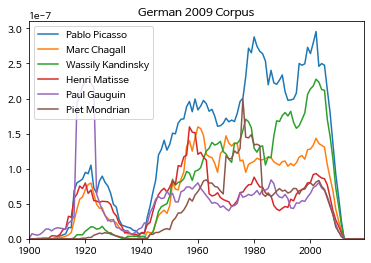

In [4]:
ger09.plot()
plt.title('German 2009 Corpus')
plt.axis([1900, 2019, 0, 3.1e-7])
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/ger09.png')

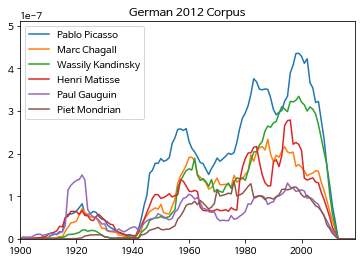

In [5]:
ger12.plot()
plt.title('German 2012 Corpus')
plt.axis([1900, 2019, 0, 5.1e-7])
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/ger12.png')

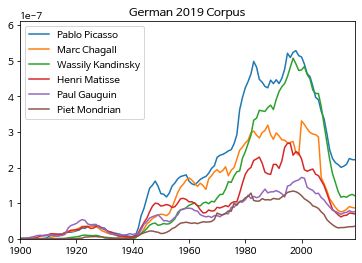

In [6]:
ger19.plot()
plt.title('German 2019 Corpus')
plt.axis([1900, 2019, 0, 6.1e-7])
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/ger19.png')

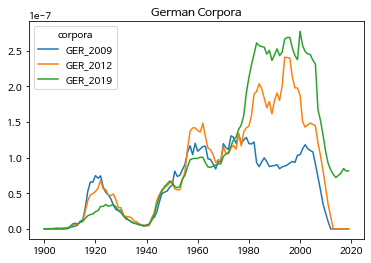

In [7]:
#세 개의 코퍼스 merge
german_corpus=pd.merge(ger09, ger12, left_index=True, right_index=True)
german_corpus=pd.merge(german_corpus, ger19, left_index=True, right_index=True)

#Hierarchical indexing
german_corpus.columns=pd.MultiIndex.from_product([['GER_2009', 'GER_2012', 'GER_2019'], 
                                                  list(painter_list)], 
                                                 names=['corpora', 'painters'])

#차트 생성
german_corpus.groupby(level='corpora', axis=1).agg('median').plot()
plt.title('German Corpora')
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/german_corpus.png')

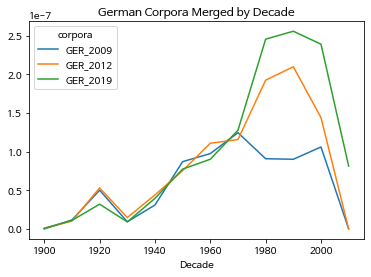

In [8]:
#Decade열 추가
german_corpus['Decade']=[str(i)[:-1]+'0' for i in german_corpus.index]

#10년 단위로
german_corpus.groupby(by=german_corpus.Decade, axis=0).median().groupby(level='corpora', axis=1).agg('median').plot()
plt.title('German Corpora Merged by Decade')
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/german_corpus_byDecade.png')

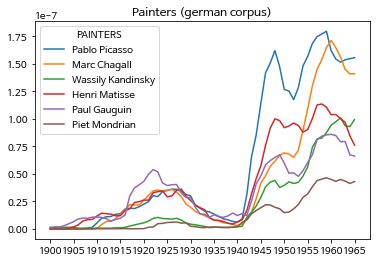

In [9]:
#독일어 코퍼스
gerCo=GoogleNgrams(list_str, B=1900, C=1965, D='ger_2019')
gerCo.columns.name='PAINTERS'

#차트 생성
gerCo.plot()
plt.title('Painters (german corpus)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/german_corpus_painters.png')

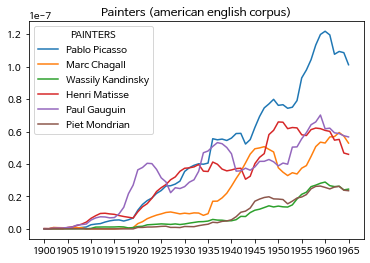

In [10]:
#미국 영어 코퍼스
usCo=GoogleNgrams(list_str, B=1900, C=1965, D='eng_us_2019')
usCo.columns.name='PAINTERS'

#차트 생성
usCo.plot()
plt.title('Painters (american english corpus)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/american_corpus_painters.png')

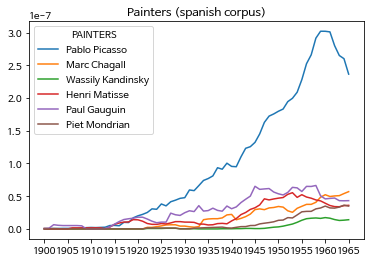

In [11]:
#스페인어 코퍼스
spaCo=GoogleNgrams(list_str, B=1900, C=1965, D='spa_2019')
spaCo.columns.name='PAINTERS'

#차트 생성
spaCo.plot()
plt.title('Painters (spanish corpus)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/spanish_corpus_painters.png')

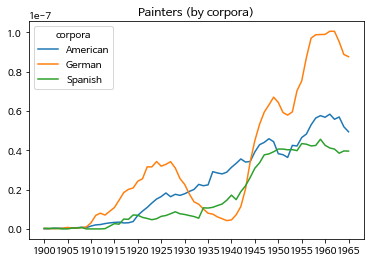

In [12]:
#세 개의 코퍼스 merge
painters_3corpora=pd.merge(gerCo, usCo, left_index=True, right_index=True)
painters_3corpora=pd.merge(painters_3corpora, spaCo, left_index=True, right_index=True)

#Hierarchical Indexing
painters_3corpora.columns=pd.MultiIndex.from_product([['German', 'American','Spanish'], 
                                                      list(painter_list)], 
                                                     names=['corpora', 'painters'])

#차트 생성
painters_3corpora.groupby(level='corpora', axis=1).median().plot()
plt.title('Painters (by corpora)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/painters_3corpora.png')

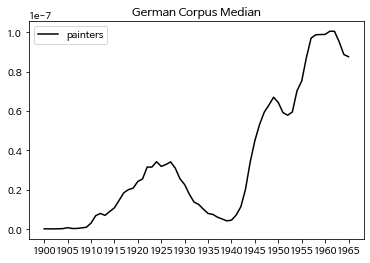

In [13]:
#독일어 코퍼스에서 화가들의 중앙값
german_median=painters_3corpora.groupby(level='corpora', axis=1).median().German
german_median.plot(color='k')
plt.title('German Corpus Median')
plt.legend(['painters'])
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/german_median.png')

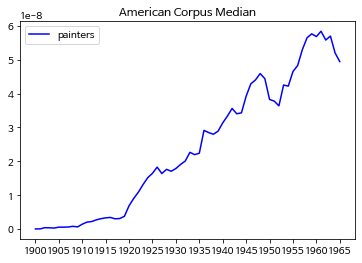

In [14]:
#영어 코퍼스에서 화가들의 중앙값
american_median=painters_3corpora.groupby(level='corpora', axis=1).median().American
american_median.plot(color='b')
plt.title('American Corpus Median')
plt.legend(['painters'])
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/american_median.png')

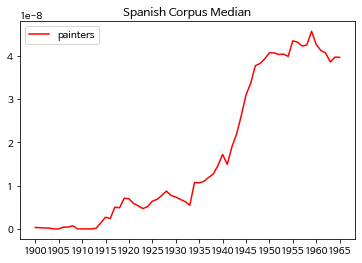

In [15]:
#스페인어 코퍼스에서 화가들의 중앙값
spanish_median=painters_3corpora.groupby(level='corpora', axis=1).median().Spanish
spanish_median.plot(color='r')
plt.title('Spanish Corpus Median')
plt.legend(['painters'])
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/spanish_median.png')

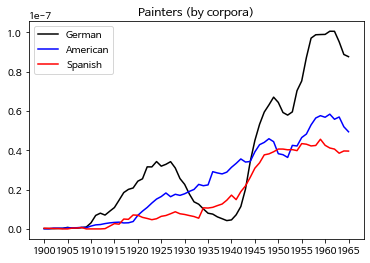

In [16]:
plt.plot(german_median,'k',
         american_median,'b',
         spanish_median,'r')
plt.legend(['German', 'American', 'Spanish'])
plt.title('Painters (by corpora)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/painters_3corpora.png')

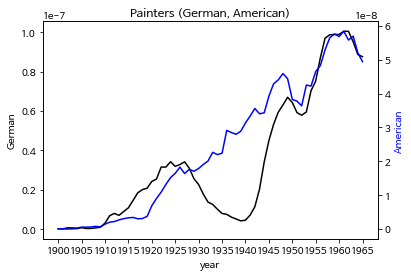

In [17]:
#척도가 다른 독일과 미국의 코퍼스를 하나의 차트로 생성
fig, ax1=plt.subplots()
ax1.set_xlabel('year')
ax1.set_ylabel('German', color='k')
ax1.plot(german_median, color='k')
ax2=ax1.twinx()
ax2.set_ylabel('American',color='b')
ax2.plot(american_median, color='b')
plt.title('Painters (German, American)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/painters_german&us.png')

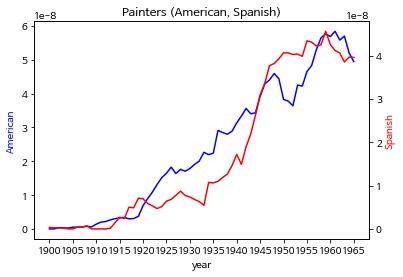

In [18]:
#척도가 다른 미국과 스페인의 코퍼스를 하나의 차트로 생성
fig, ax1=plt.subplots()
ax1.set_xlabel('year')
ax1.set_ylabel('American', color='b')
ax1.plot(american_median, color='b')
ax2=ax1.twinx()
ax2.set_ylabel('Spanish',color='r')
ax2.plot(spanish_median, color='r')
plt.title('Painters (American, Spanish)')
plt.xticks(range(1900, 1966, 5))
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/painters_us&spain.png')

In [19]:
#세 개의 중앙값 merge
corpora=pd.merge(german_median, american_median, left_index=True, right_index=True)
corpora=pd.merge(corpora, spanish_median, left_index=True, right_index=True)
corpora

,German,American,Spanish
1900,2.052939e-10,4.899969e-11,3.368341e-10
1901,1.741903e-10,5.816080e-11,2.694673e-10
1902,1.451585e-10,4.084500e-10,2.245561e-10
1903,2.139995e-10,3.769790e-10,1.924766e-10
1904,2.934753e-10,3.038830e-10,0.000000e+00
...,...,...,...
1961,1.005818e-07,5.838703e-08,4.117606e-08
1962,1.005474e-07,5.579103e-08,4.062013e-08
1963,9.520995e-08,5.695287e-08,3.852321e-08
1964,8.876403e-08,5.197817e-08,3.966117e-08


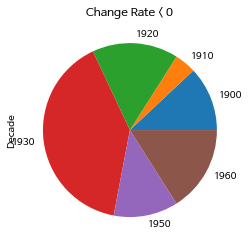

In [20]:
#독일어 코퍼스의 변동률
germany_changeRate=pd.DataFrame(corpora.German.pct_change()[1:])
germany_changeRate.columns=['ChangeRate']
germany_changeRate['Decade']=[str(i)[:-1]+'0' for i in germany_changeRate.index]

#변동률 감소 빈도를 나타내는 pie 차트 생성
germany_changeRate[germany_changeRate.ChangeRate<0].Decade.value_counts().sort_index().plot.pie()
plt.title('Change Rate < 0')
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/changeRate_minus.png')

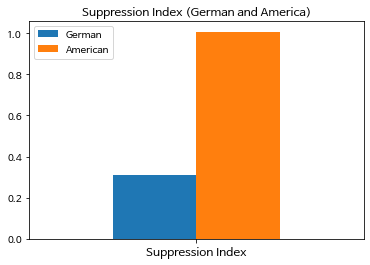

In [21]:
#독일 억압지수
german_2333=corpora.German[23:34]
german_3345=corpora.German[33:46]
german_4555=corpora.German[45:56]
german_prepost=german_2333.append(german_4555)
german_sup=german_3345.mean()/german_prepost.mean()

#미국 억압지수
us_2333=corpora.American[23:34]
us_3345=corpora.American[33:46]
us_4555=corpora.American[45:56]
us_prepost=us_2333.append(us_4555)
us_sup=us_3345.mean()/us_prepost.mean()

#억압지수 bar차트 생성
sup=pd.DataFrame({'German':german_sup, 'American':us_sup}, index=['Suppression Index'])
sup.plot.bar()
plt.xticks(rotation=0, fontsize='large')
plt.title('Suppression Index (German and America)')
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/g&u_suppression.png')

In [22]:
#독일어 코퍼스 화가별 억압지수
picasso_g=gerCo['Pablo Picasso']
g2333_picasso=picasso_g[23:34]
g3345_picasso=picasso_g[33:46]
g4555_picasso=picasso_g[45:56]
gprepost_picasso=g2333_picasso.append(g4555_picasso)
g_picasso_sup=g3345_picasso.mean()/gprepost_picasso.mean()

chagall_g=gerCo['Marc Chagall']
g2333_chagall=chagall_g[23:34]
g3345_chagall=chagall_g[33:46]
g4555_chagall=chagall_g[45:56]
gprepost_chagall=g2333_chagall.append(g4555_chagall)
g_chagall_sup=g3345_chagall.mean()/gprepost_chagall.mean()

kandinsky_g=gerCo['Wassily Kandinsky']
g2333_kandinsky=kandinsky_g[23:34]
g3345_kandinsky=kandinsky_g[33:46]
g4555_kandinsky=kandinsky_g[45:56]
gprepost_kandinsky=g2333_kandinsky.append(g4555_kandinsky)
g_kandinsky_sup=g3345_kandinsky.mean()/gprepost_kandinsky.mean()

matisse_g=gerCo['Henri Matisse']
g2333_matisse=matisse_g[23:34]
g3345_matisse=matisse_g[33:46]
g4555_matisse=matisse_g[45:56]
gprepost_matisse=g2333_matisse.append(g4555_matisse)
g_matisse_sup=g3345_matisse.mean()/gprepost_matisse.mean()

gauguin_g=gerCo['Paul Gauguin']
g2333_gauguin=gauguin_g[23:34]
g3345_gauguin=gauguin_g[33:46]
g4555_gauguin=gauguin_g[45:56]
gprepost_gauguin=g2333_gauguin.append(g4555_gauguin)
g_gauguin_sup=g3345_gauguin.mean()/gprepost_gauguin.mean()

mondrian_g=gerCo['Piet Mondrian']
g2333_mondrian=mondrian_g[23:34]
g3345_mondrian=mondrian_g[33:46]
g4555_mondrian=mondrian_g[45:56]
gprepost_mondrian=g2333_mondrian.append(g4555_mondrian)
g_mondrian_sup=g3345_mondrian.mean()/gprepost_mondrian.mean()

In [23]:
#미국 영어 코퍼스 화가별 억압지수
picasso_a=usCo['Pablo Picasso']
a2333_picasso=picasso_a[23:34]
a3345_picasso=picasso_a[33:46]
a4555_picasso=picasso_a[45:56]
aprepost_picasso=a2333_picasso.append(a4555_picasso)
a_picasso_sup=a3345_picasso.mean()/aprepost_picasso.mean()

chagall_a=usCo['Marc Chagall']
a2333_chagall=chagall_a[23:34]
a3345_chagall=chagall_a[33:46]
a4555_chagall=chagall_a[45:56]
aprepost_chagall=a2333_chagall.append(a4555_chagall)
a_chagall_sup=a3345_chagall.mean()/aprepost_chagall.mean()

kandinsky_a=usCo['Wassily Kandinsky']
a2333_kandinsky=kandinsky_a[23:34]
a3345_kandinsky=kandinsky_a[33:46]
a4555_kandinsky=kandinsky_a[45:56]
aprepost_kandinsky=a2333_kandinsky.append(a4555_kandinsky)
a_kandinsky_sup=a3345_kandinsky.mean()/aprepost_kandinsky.mean()

matisse_a=usCo['Henri Matisse']
a2333_matisse=matisse_a[23:34]
a3345_matisse=matisse_a[33:46]
a4555_matisse=matisse_a[45:56]
aprepost_matisse=a2333_matisse.append(a4555_matisse)
a_matisse_sup=a3345_matisse.mean()/aprepost_matisse.mean()

gauguin_a=usCo['Paul Gauguin']
a2333_gauguin=gauguin_a[23:34]
a3345_gauguin=gauguin_a[33:46]
a4555_gauguin=gauguin_a[45:56]
aprepost_gauguin=a2333_gauguin.append(a4555_gauguin)
a_gauguin_sup=a3345_gauguin.mean()/aprepost_gauguin.mean()

mondrian_a=usCo['Piet Mondrian']
a2333_mondrian=mondrian_a[23:34]
a3345_mondrian=mondrian_a[33:46]
a4555_mondrian=mondrian_a[45:56]
aprepost_mondrian=a2333_mondrian.append(a4555_mondrian)
a_mondrian_sup=a3345_mondrian.mean()/aprepost_mondrian.mean()

<AxesSubplot:>

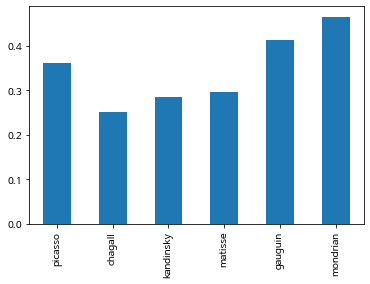

In [24]:
#독일어 코퍼스 화가별 억압지수 Series 생성
gpainters_sup=pd.Series({'picasso':g_picasso_sup, 
                         'chagall':g_chagall_sup, 
                         'kandinsky':g_kandinsky_sup, 
                         'matisse':g_matisse_sup, 
                         'gauguin':g_gauguin_sup, 
                         'mondrian':g_mondrian_sup})

#차트 생성
gpainters_sup.plot.bar()

<AxesSubplot:>

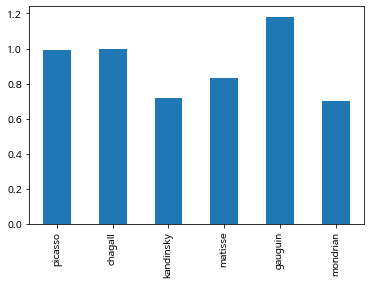

In [25]:
#미국 영어 코퍼스 화가별 억압지수 Series 생성
apainters_sup=pd.Series({'picasso':a_picasso_sup, 
                         'chagall':a_chagall_sup, 
                         'kandinsky':a_kandinsky_sup, 
                         'matisse':a_matisse_sup, 
                         'gauguin':a_gauguin_sup, 
                         'mondrian':a_mondrian_sup})

#차트 생성
apainters_sup.plot.bar()

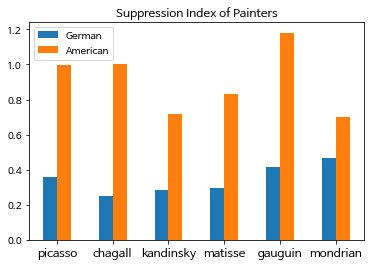

In [27]:
#독일어와 미국 영어 코퍼스의 화가별 억압지수 dataFrame 생성
painters_sup=pd.DataFrame(gpainters_sup, columns=['German'])
painters_sup['American']=apainters_sup

#차트 생성
painters_sup.plot.bar()
plt.xticks(rotation=0, fontsize='large')
plt.title('Suppression Index of Painters')
plt.savefig('E:/서강대학교/6학기/빅데이터학/빅데이터학_3차과제/그래프/suppression.png')